# Customer Segment Analysis

### Importing necessary libraries & Load the data

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import date
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix

In [4]:
# Load the dataset
df = pd.read_excel(r'/content/marketing_campaign1 (1).xlsx')

### Data Exploration

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [10]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [11]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


## Data Cleaning & Feature Engineering

### Since Z_CostContact & Z_Revenue are constant values we can drop these for further analysis

In [12]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

### Handling missing values in income

In [13]:
# Calculate median income for each education level
median_income_by_education = df.groupby('Education')['Income'].median()

In [14]:
# Function to impute missing income values based on education level
def impute_income(row):
    if pd.isnull(row['Income']):
        return median_income_by_education[row['Education']]
    else:
        return row['Income']

In [15]:
# Apply imputation function to fill missing income values
df['Income'] = df.apply(impute_income, axis=1)

### Reducing features based on expense

In [16]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Reducing features based on Accepted campaign

In [17]:
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

### Reducing features based on No. of purchases

In [18]:
df['Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

### Reducing features based on Education

In [19]:
# dividing the education levels into three categories based on undergraduate, postgraduate, and doctoral degrees
# 2nd Cycle: This refers to postgraduate studies following completion of the 1st cycle, leading to a master's degree.
df['Education'] = df['Education'].replace(['2n Cycle', 'Master'],'Post Graduate')
df['Education'] = df['Education'].replace(['Basic','Graduation'], 'Under Graduate')

### Age from year of birth

In [20]:
df['Age'] = 2024 - df['Year_Birth']

###  customer enrolement date

In [21]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [22]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df['Customer_For'] = df['Customer_For'].apply(lambda x:x.days)

### Reducing features based on Marital_Status

In [23]:
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

### Reducing features based on No. of kids

In [24]:
df['Children'] = df['Kidhome'] + df['Teenhome']

### Reducing features based on family size

In [25]:
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner':2}) + df['Children']

### Reducing features based on parenthood

In [26]:
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

### Dropping redundant columns

In [27]:
col_del = ['Marital_Status', 'Dt_Customer', 'Year_Birth', 'ID', 'Kidhome', 'Teenhome']
df=df.drop(columns=col_del,axis=1)

In [28]:
df.nunique()

,0
Education,3
Income,1976
Recency,100
MntWines,776
MntFruits,158
MntMeatProducts,558
MntFishProducts,182
MntSweetProducts,177
MntGoldProds,213
NumDealsPurchases,15


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   MntWines             2240 non-null   int64  
 4   MntFruits            2240 non-null   int64  
 5   MntMeatProducts      2240 non-null   int64  
 6   MntFishProducts      2240 non-null   int64  
 7   MntSweetProducts     2240 non-null   int64  
 8   MntGoldProds         2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  NumWebVisitsMonth    2240 non-null   int64  
 14  AcceptedCmp3         2240 non-null   int64  
 15  AcceptedCmp4         2240 non-null   i

## Univariate analysis for Categorical variables

In [30]:
def bar(col):
    column_counts = df[col].value_counts()
    plt.figure(figsize=(10, 6))
    column_counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [31]:
def pie(column_name):
    column_counts = df[column_name].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column_name}')
    plt.axis('equal')
    plt.show()

### 1.Analysis on  Education.

In [32]:
df['Education'].unique()

array(['Under Graduate', 'PhD', 'Post Graduate'], dtype=object)

In [33]:
df['Education'].value_counts()

,count
Education,
Under Graduate,1181
Post Graduate,573
PhD,486


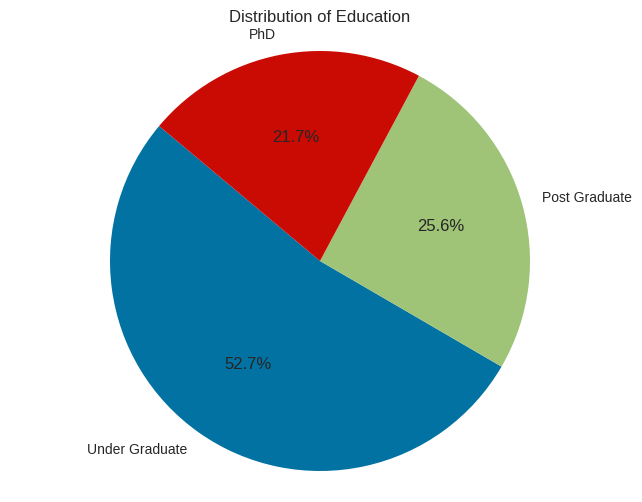

In [34]:
pie('Education')

### 2.Analysis on  Living_With

In [35]:
df['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [36]:
df['Living_With'].value_counts()

,count
Living_With,
Partner,1444
Alone,796


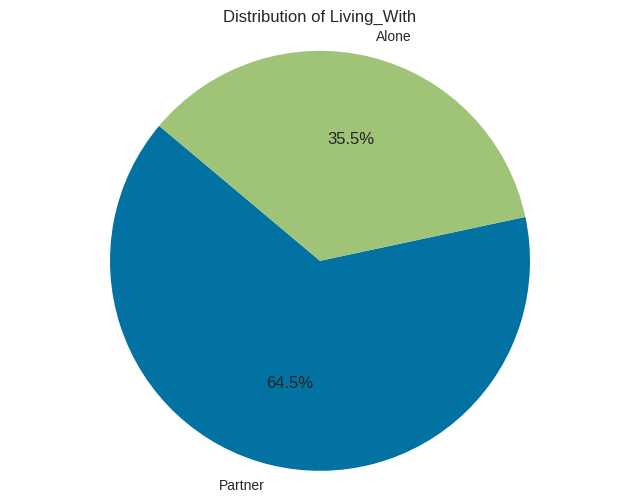

In [37]:
pie('Living_With')

### 3.Analysis on  Is_Parent

In [38]:
df['Is_Parent'].unique()

array([0, 1])

In [39]:
df['Is_Parent'].value_counts()

,count
Is_Parent,
1,1602
0,638


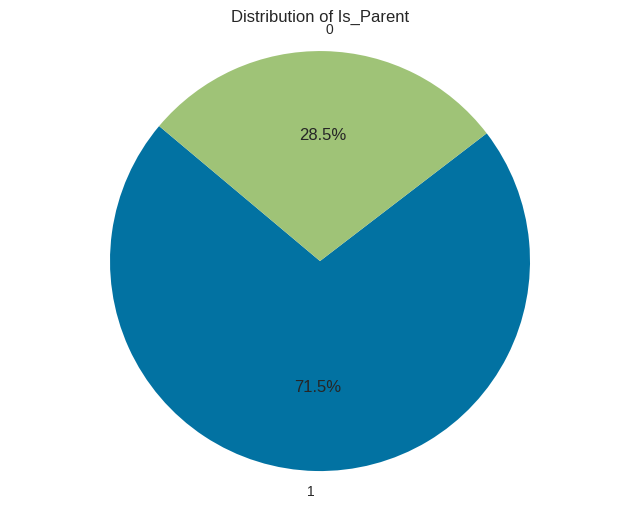

In [40]:
pie('Is_Parent')

### 4.Analysis on  Complain

In [41]:
df['Complain'].unique()

array([0, 1])

In [42]:
df['Complain'].value_counts()

,count
Complain,
0,2219
1,21


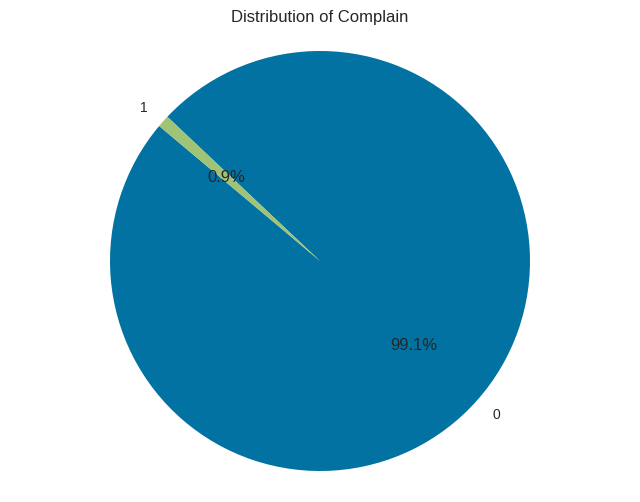

In [43]:
pie('Complain')

### 5.Analysis on  AcceptedCmp

In [44]:
df['AcceptedCmp'].unique()

array([1, 0, 3, 2, 4, 5])

In [45]:
df['AcceptedCmp'].value_counts()

,count
AcceptedCmp,
0,1631
1,370
2,142
3,51
4,36
5,10


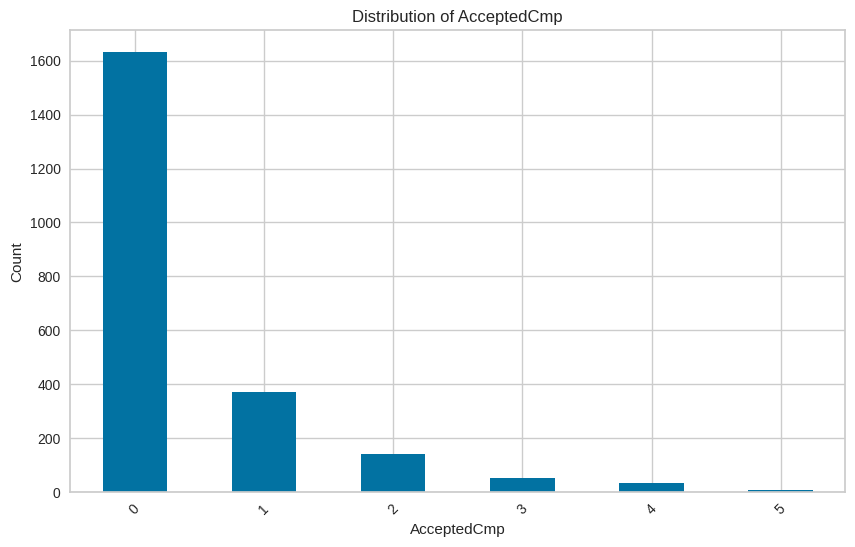

In [46]:
bar('AcceptedCmp')

### 6.Analysis on no. of kids.

In [47]:
df['Children'].unique()

array([0, 2, 1, 3])

In [48]:
df['Children'].value_counts()

,count
Children,
1,1128
0,638
2,421
3,53


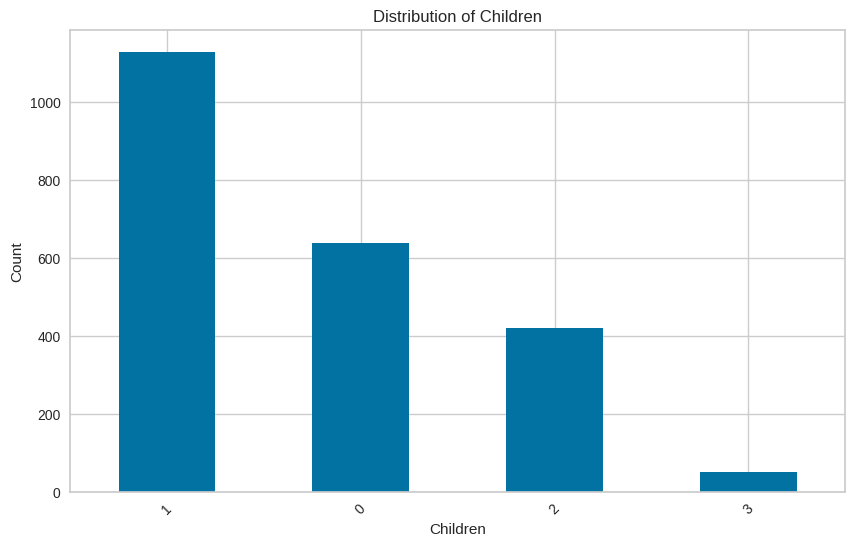

In [49]:
bar('Children')

### 7.Analysis on Family size.

In [50]:
df['Family_Size'].unique()

array([1, 3, 2, 4, 5])

In [51]:
df['Family_Size'].value_counts()

,count
Family_Size,
3,889
2,764
4,301
1,254
5,32


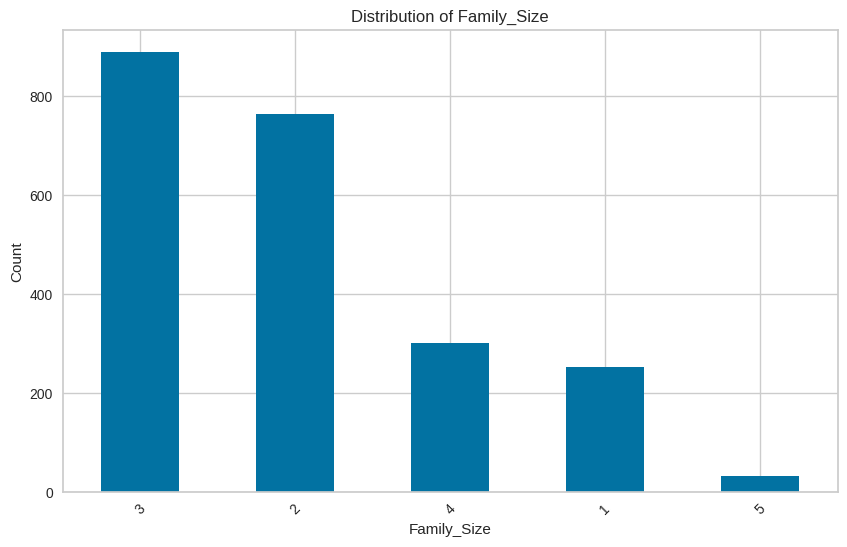

In [52]:
bar('Family_Size')

### 7.Analysis on Age.

Text(0.5, 1.0, 'Age')

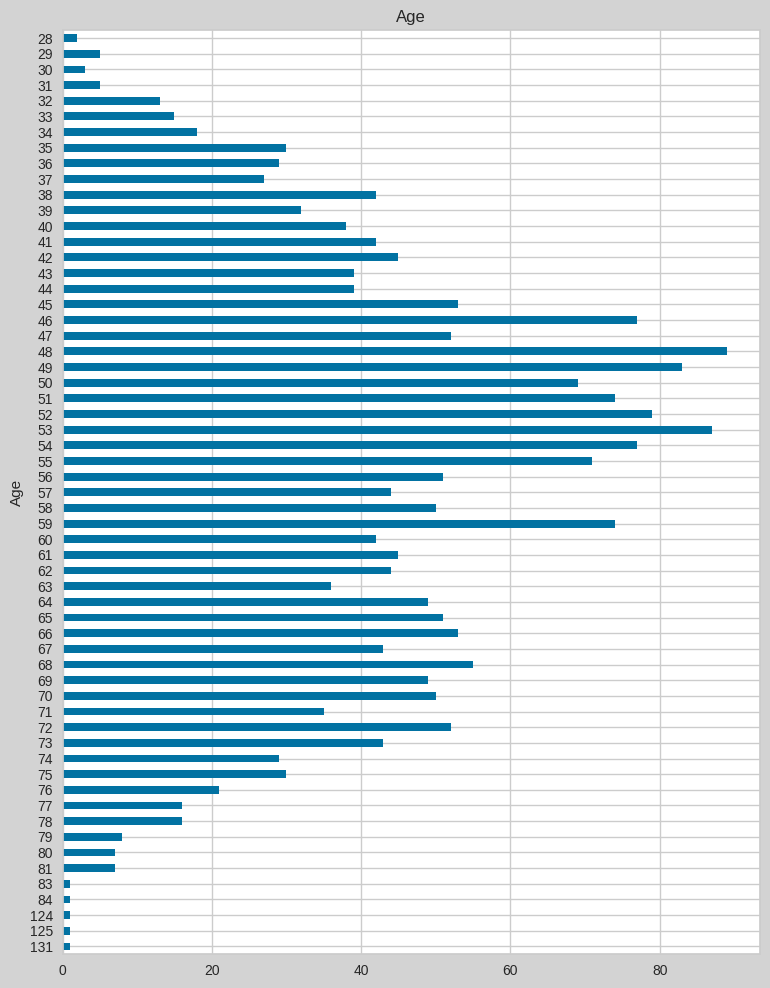

In [53]:
plt.figure(figsize=(9,12), facecolor='lightgray')
df['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

## Univariate analysis for Numerical variables

In [54]:
def distplot(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=20, kde=True)
    plt.title(f'Distribution Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()

### 8.Analysis on Income

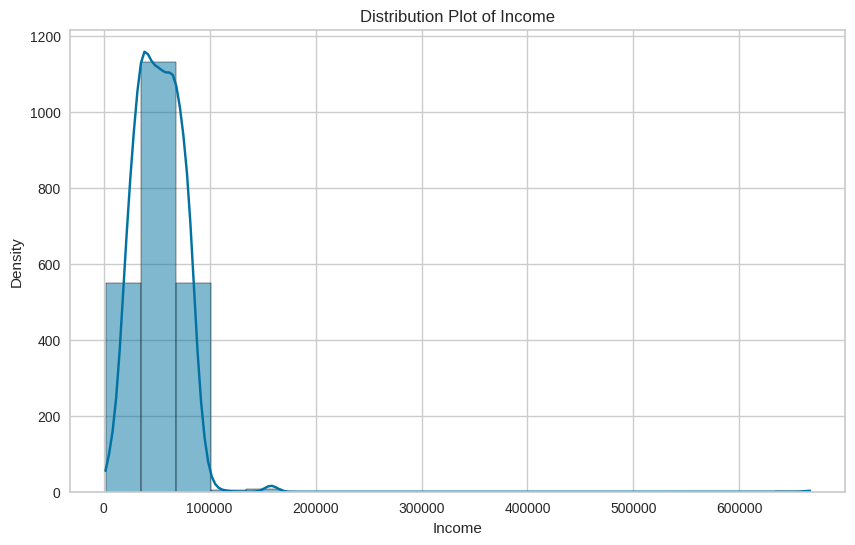

In [55]:
distplot('Income')

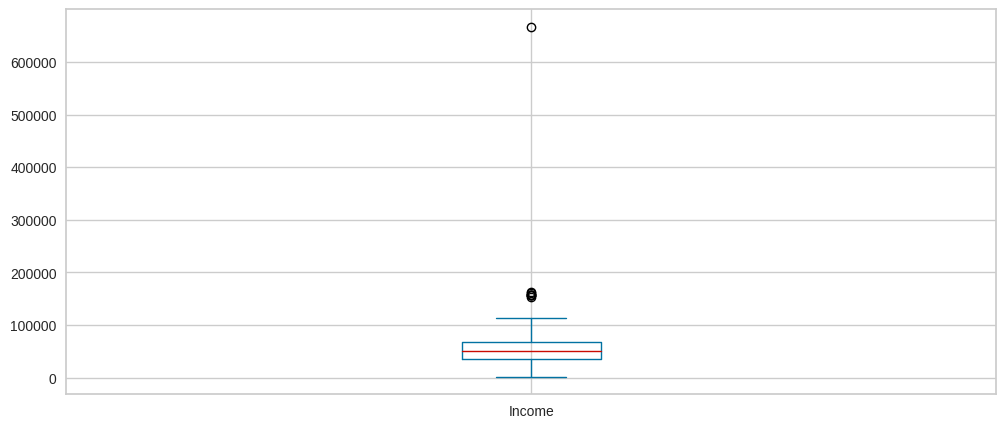

In [56]:
df["Income"].plot.box(figsize=(12,5))
plt.show()

### 9.Analysis on Expense

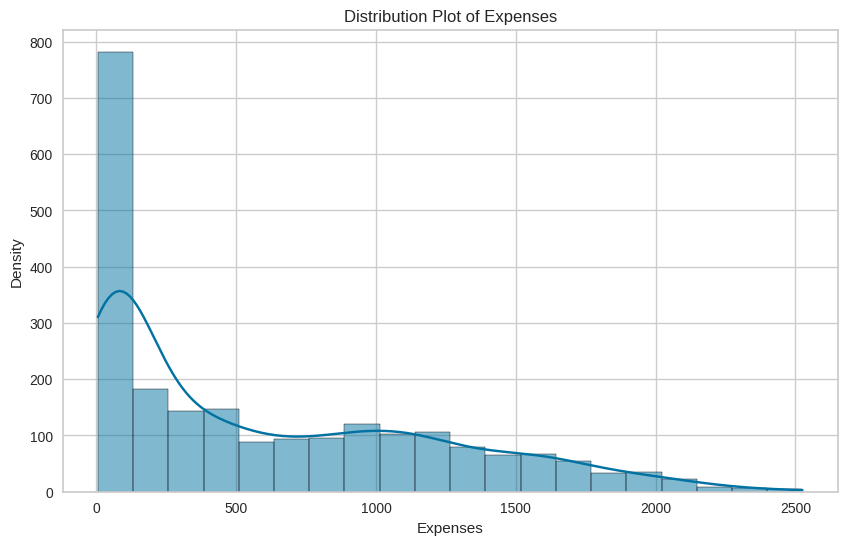

In [57]:
distplot('Expenses')

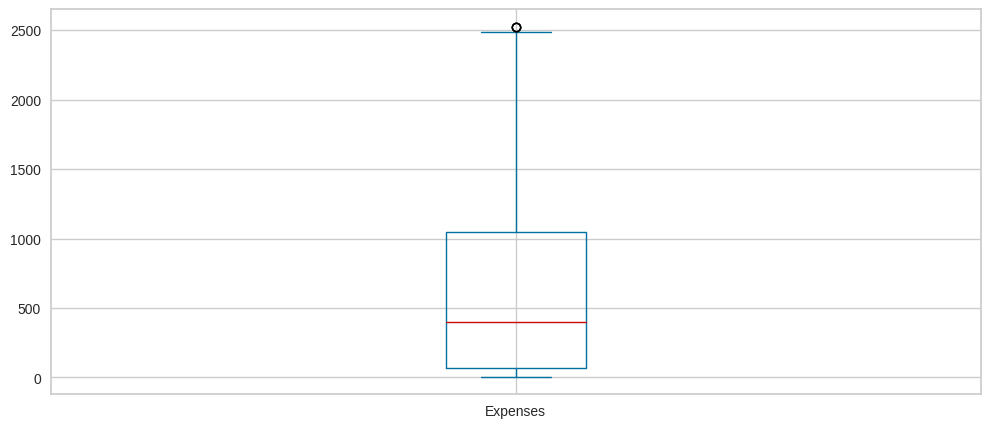

In [58]:
df["Expenses"].plot.box(figsize=(12,5))
plt.show()

### 10.Analysis on Purchases

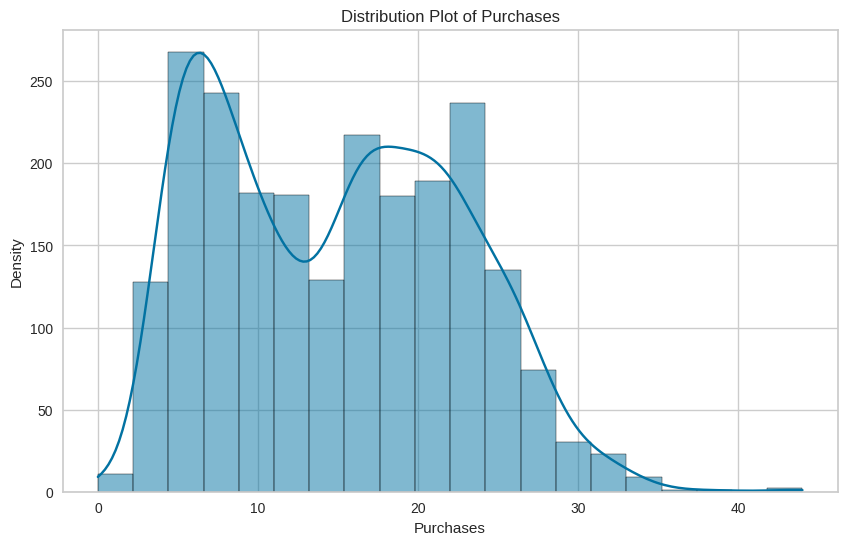

In [59]:
distplot('Purchases')

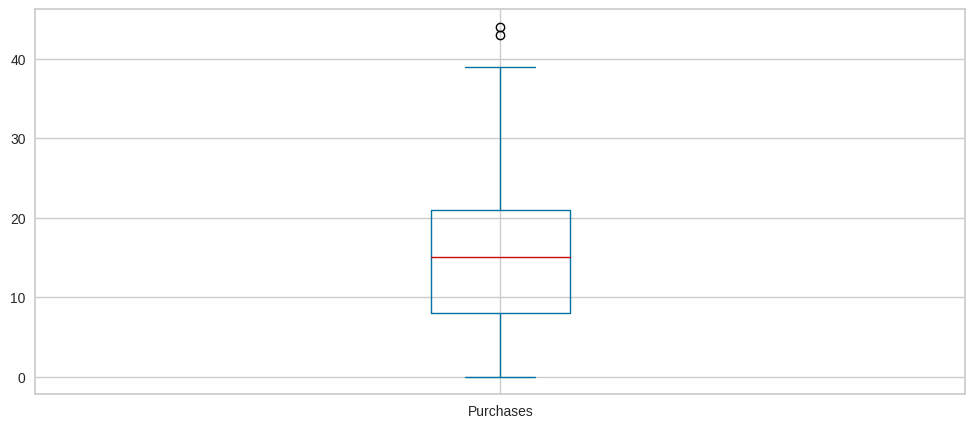

In [60]:
df["Purchases"].plot.box(figsize=(12,5))
plt.show()

### 11.Analysis on Recency

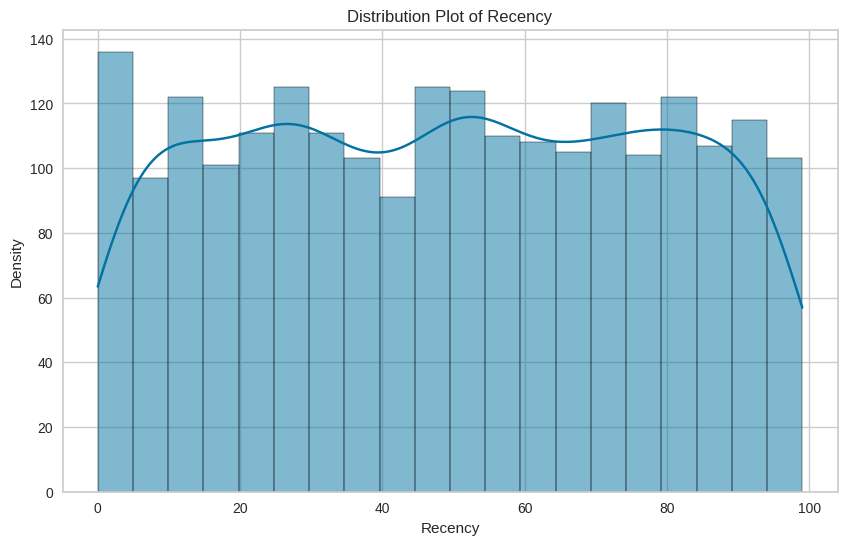

In [61]:
distplot('Recency')

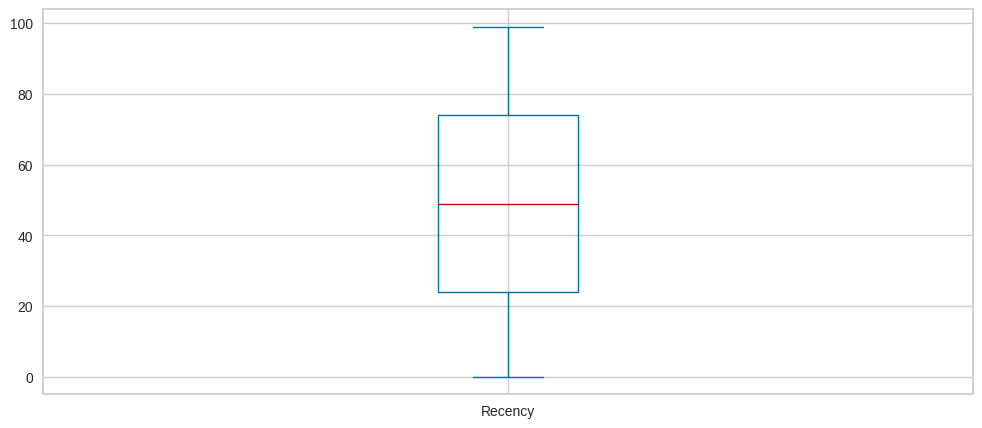

In [62]:
df["Recency"].plot.box(figsize=(12,5))
plt.show()

### 12.Analysis on Customer enrolement date

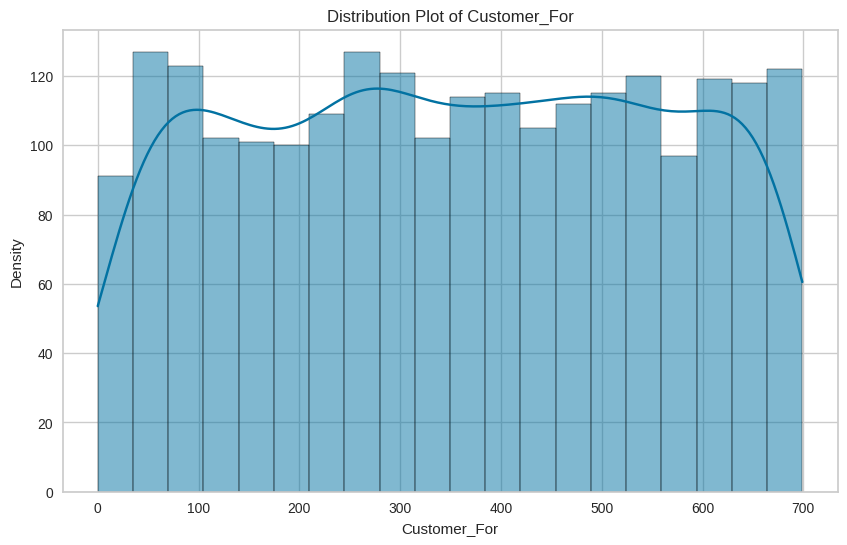

In [63]:
distplot('Customer_For')

## Bivariate Analysis

### 1.Education vs Expenses

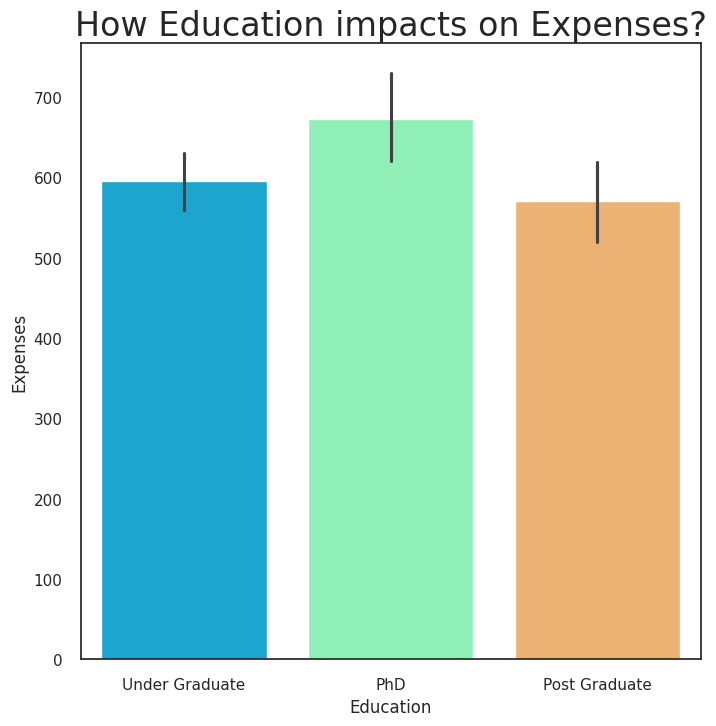

In [64]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

### 2.Marital status vs Expenses

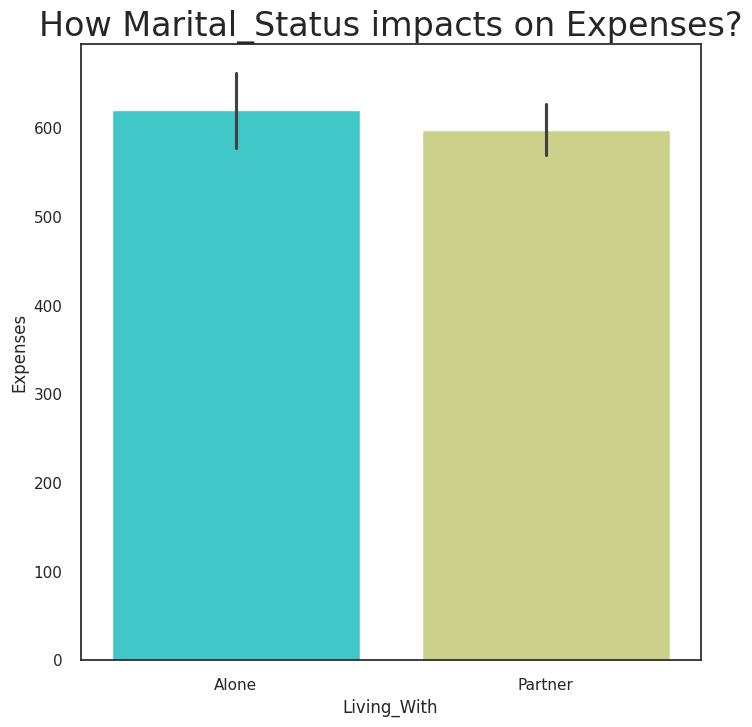

In [65]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Living_With", y="Expenses", data=df,palette="rainbow")

### 3.Kids vs Expenses

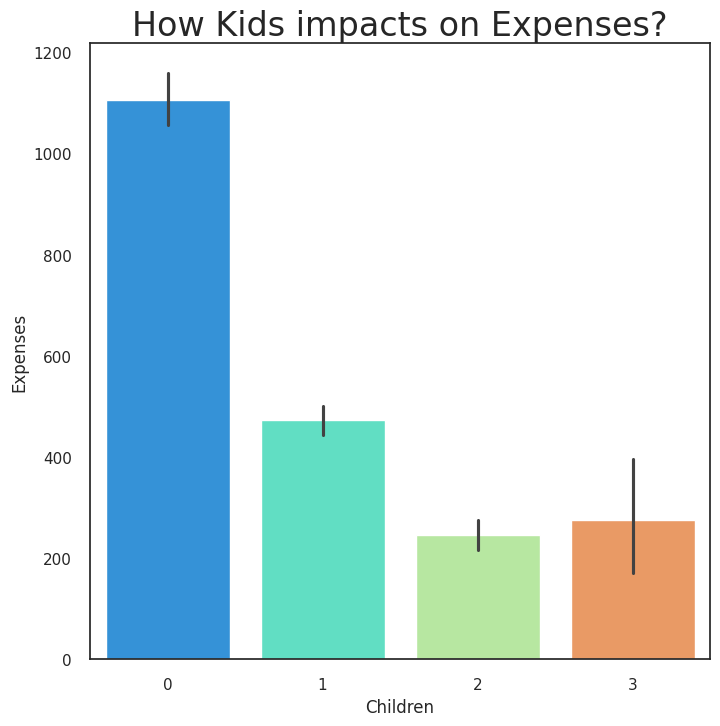

In [66]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Children", y="Expenses", data=df,palette="rainbow")

### 4.TotalAcceptedCmp vs Expenses

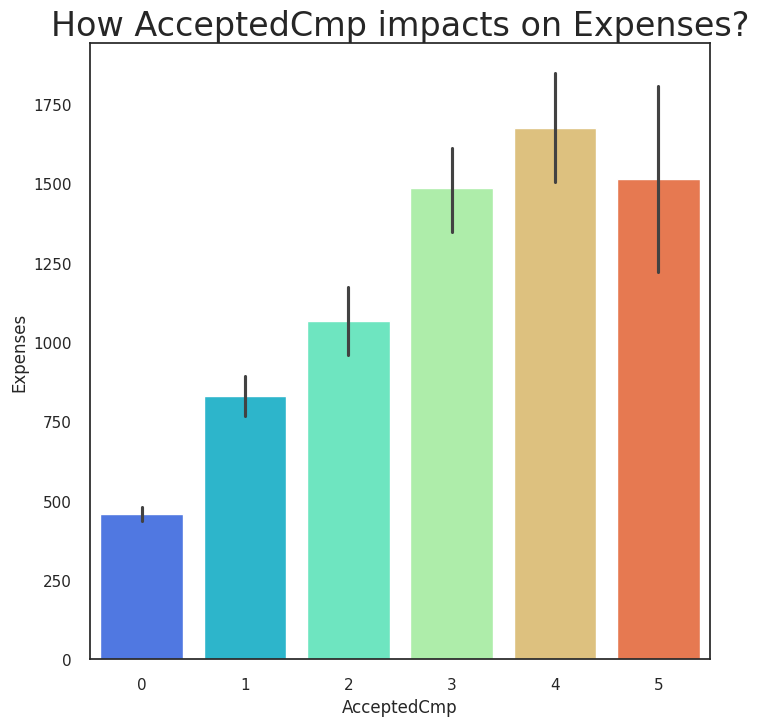

In [67]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How AcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="AcceptedCmp", y="Expenses", data=df,palette="rainbow")

### 5.NumTotalPurchases vs Expenses

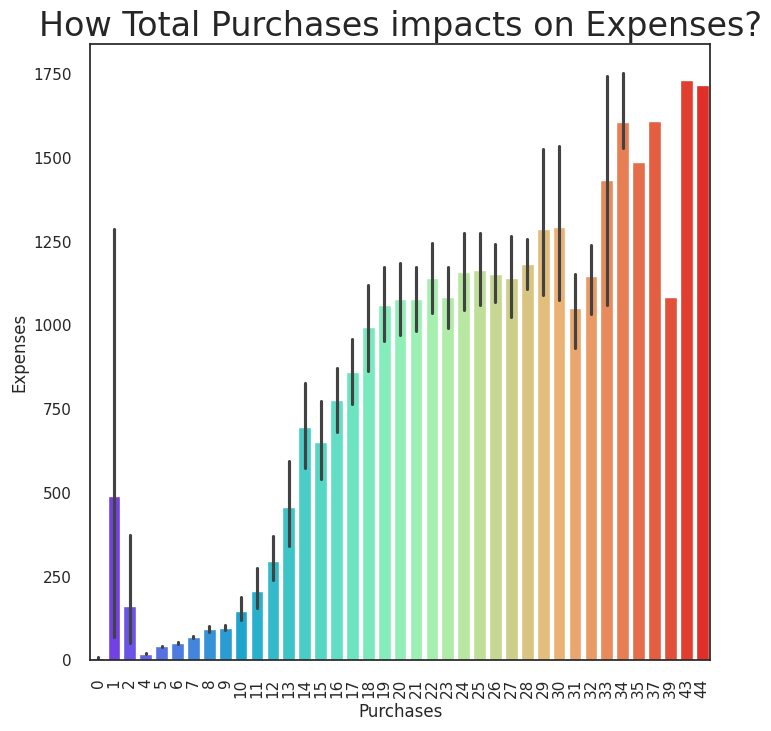

In [68]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Total Purchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Purchases", y="Expenses", data=df,palette="rainbow")

### 6.Day engaged vs Expenses

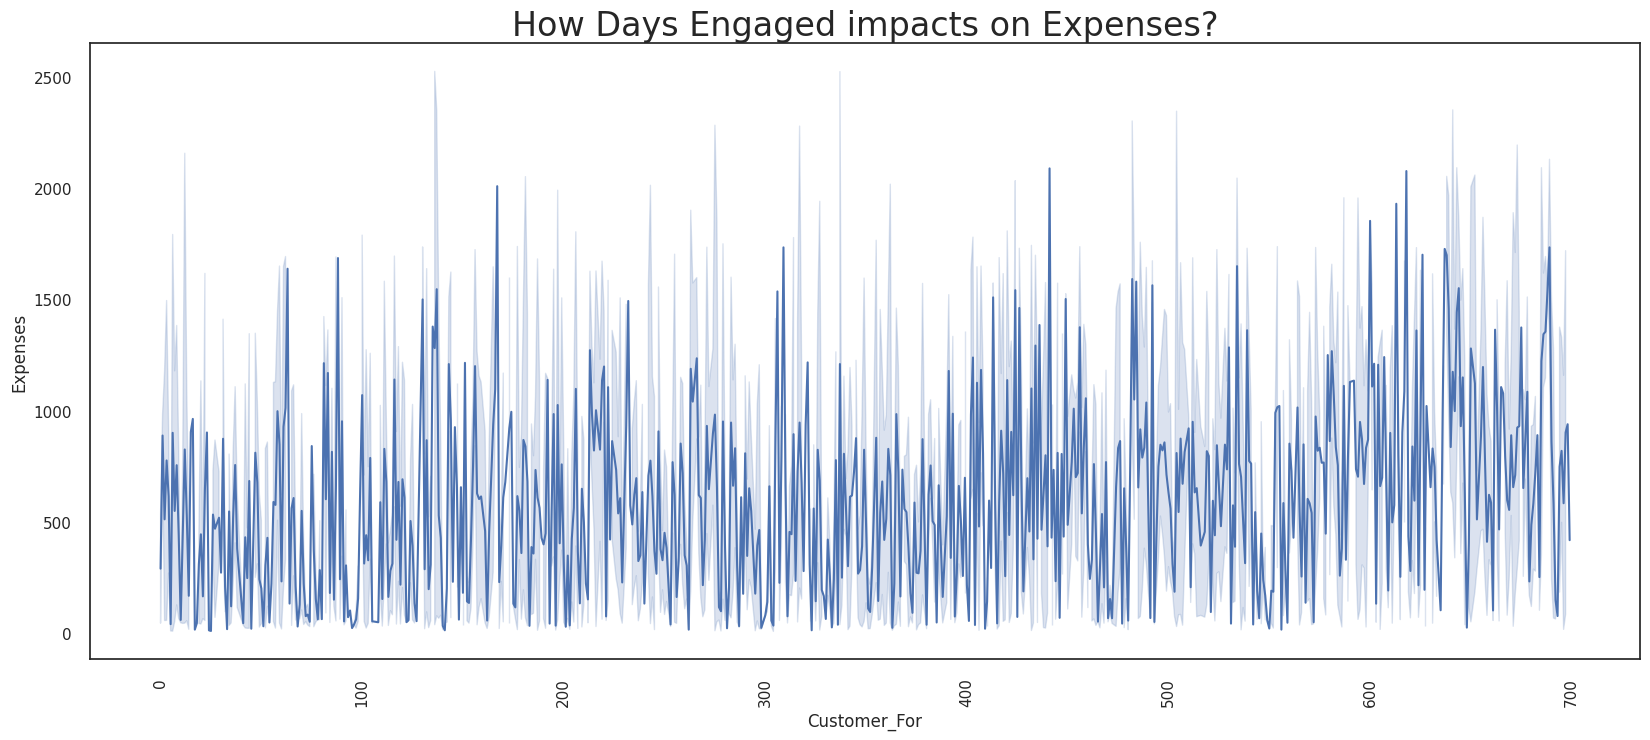

In [69]:
sns.set_theme(style="white")
plt.figure(figsize=(20,8))
plt.title("How Days Engaged impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.lineplot(x="Customer_For", y="Expenses", data=df,palette="rainbow")

### 7.Customer Age vs Expenses

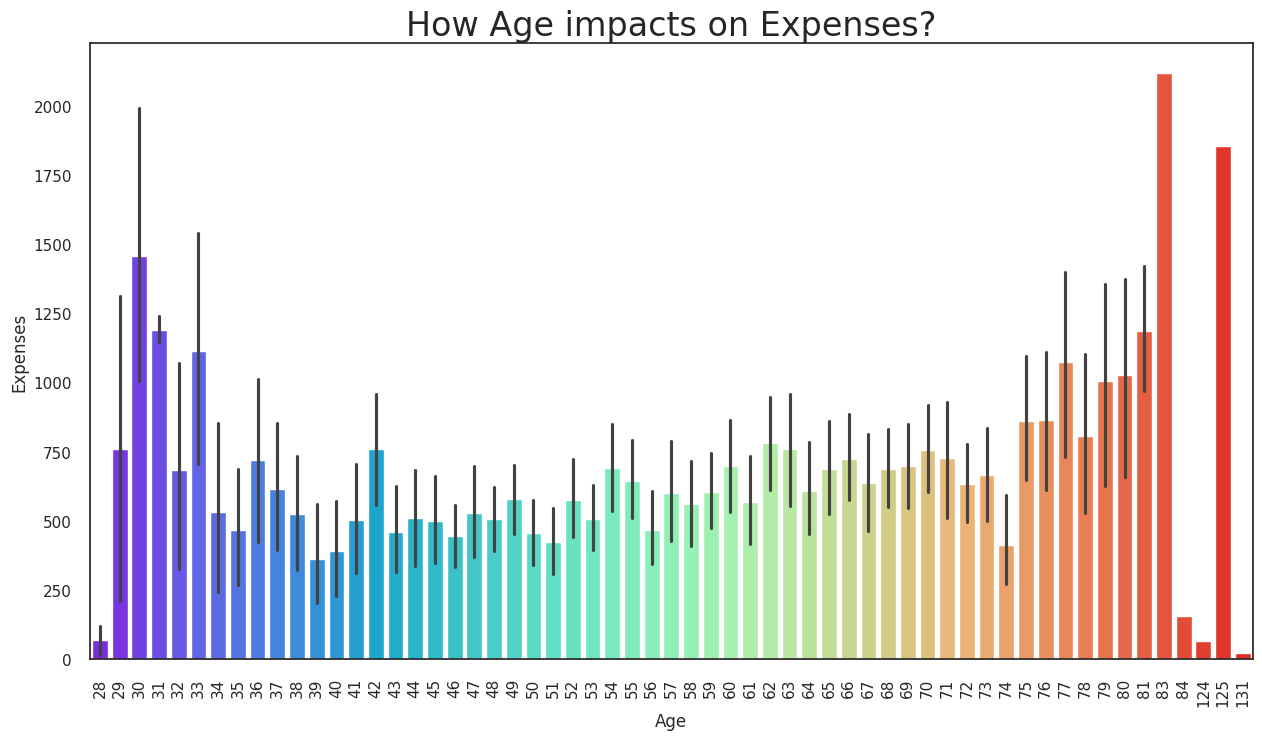

In [70]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Age", y="Expenses", data=df,palette="rainbow")

plt.show()

## Remove some outliers present in age and income

In [71]:
df = df[df['Age'] < 90]
df = df[df['Income'] < 300000]

In [72]:
df.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Expenses', 'AcceptedCmp',
       'Purchases', 'Age', 'Customer_For', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

In [73]:
# Making a Subset to consider only relevant data for correlation
df1 = df[['Income', 'AcceptedCmp', 'Education', 'Expenses', 'Purchases', 'Age', 'Customer_For','Children','Living_With','Family_Size','Is_Parent']]

## Finding correlation

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True,cmap = 'Greys',linewidths=1)

ValueError: could not convert string to float: 'Under Graduate'

<Figure size 1000x800 with 0 Axes>

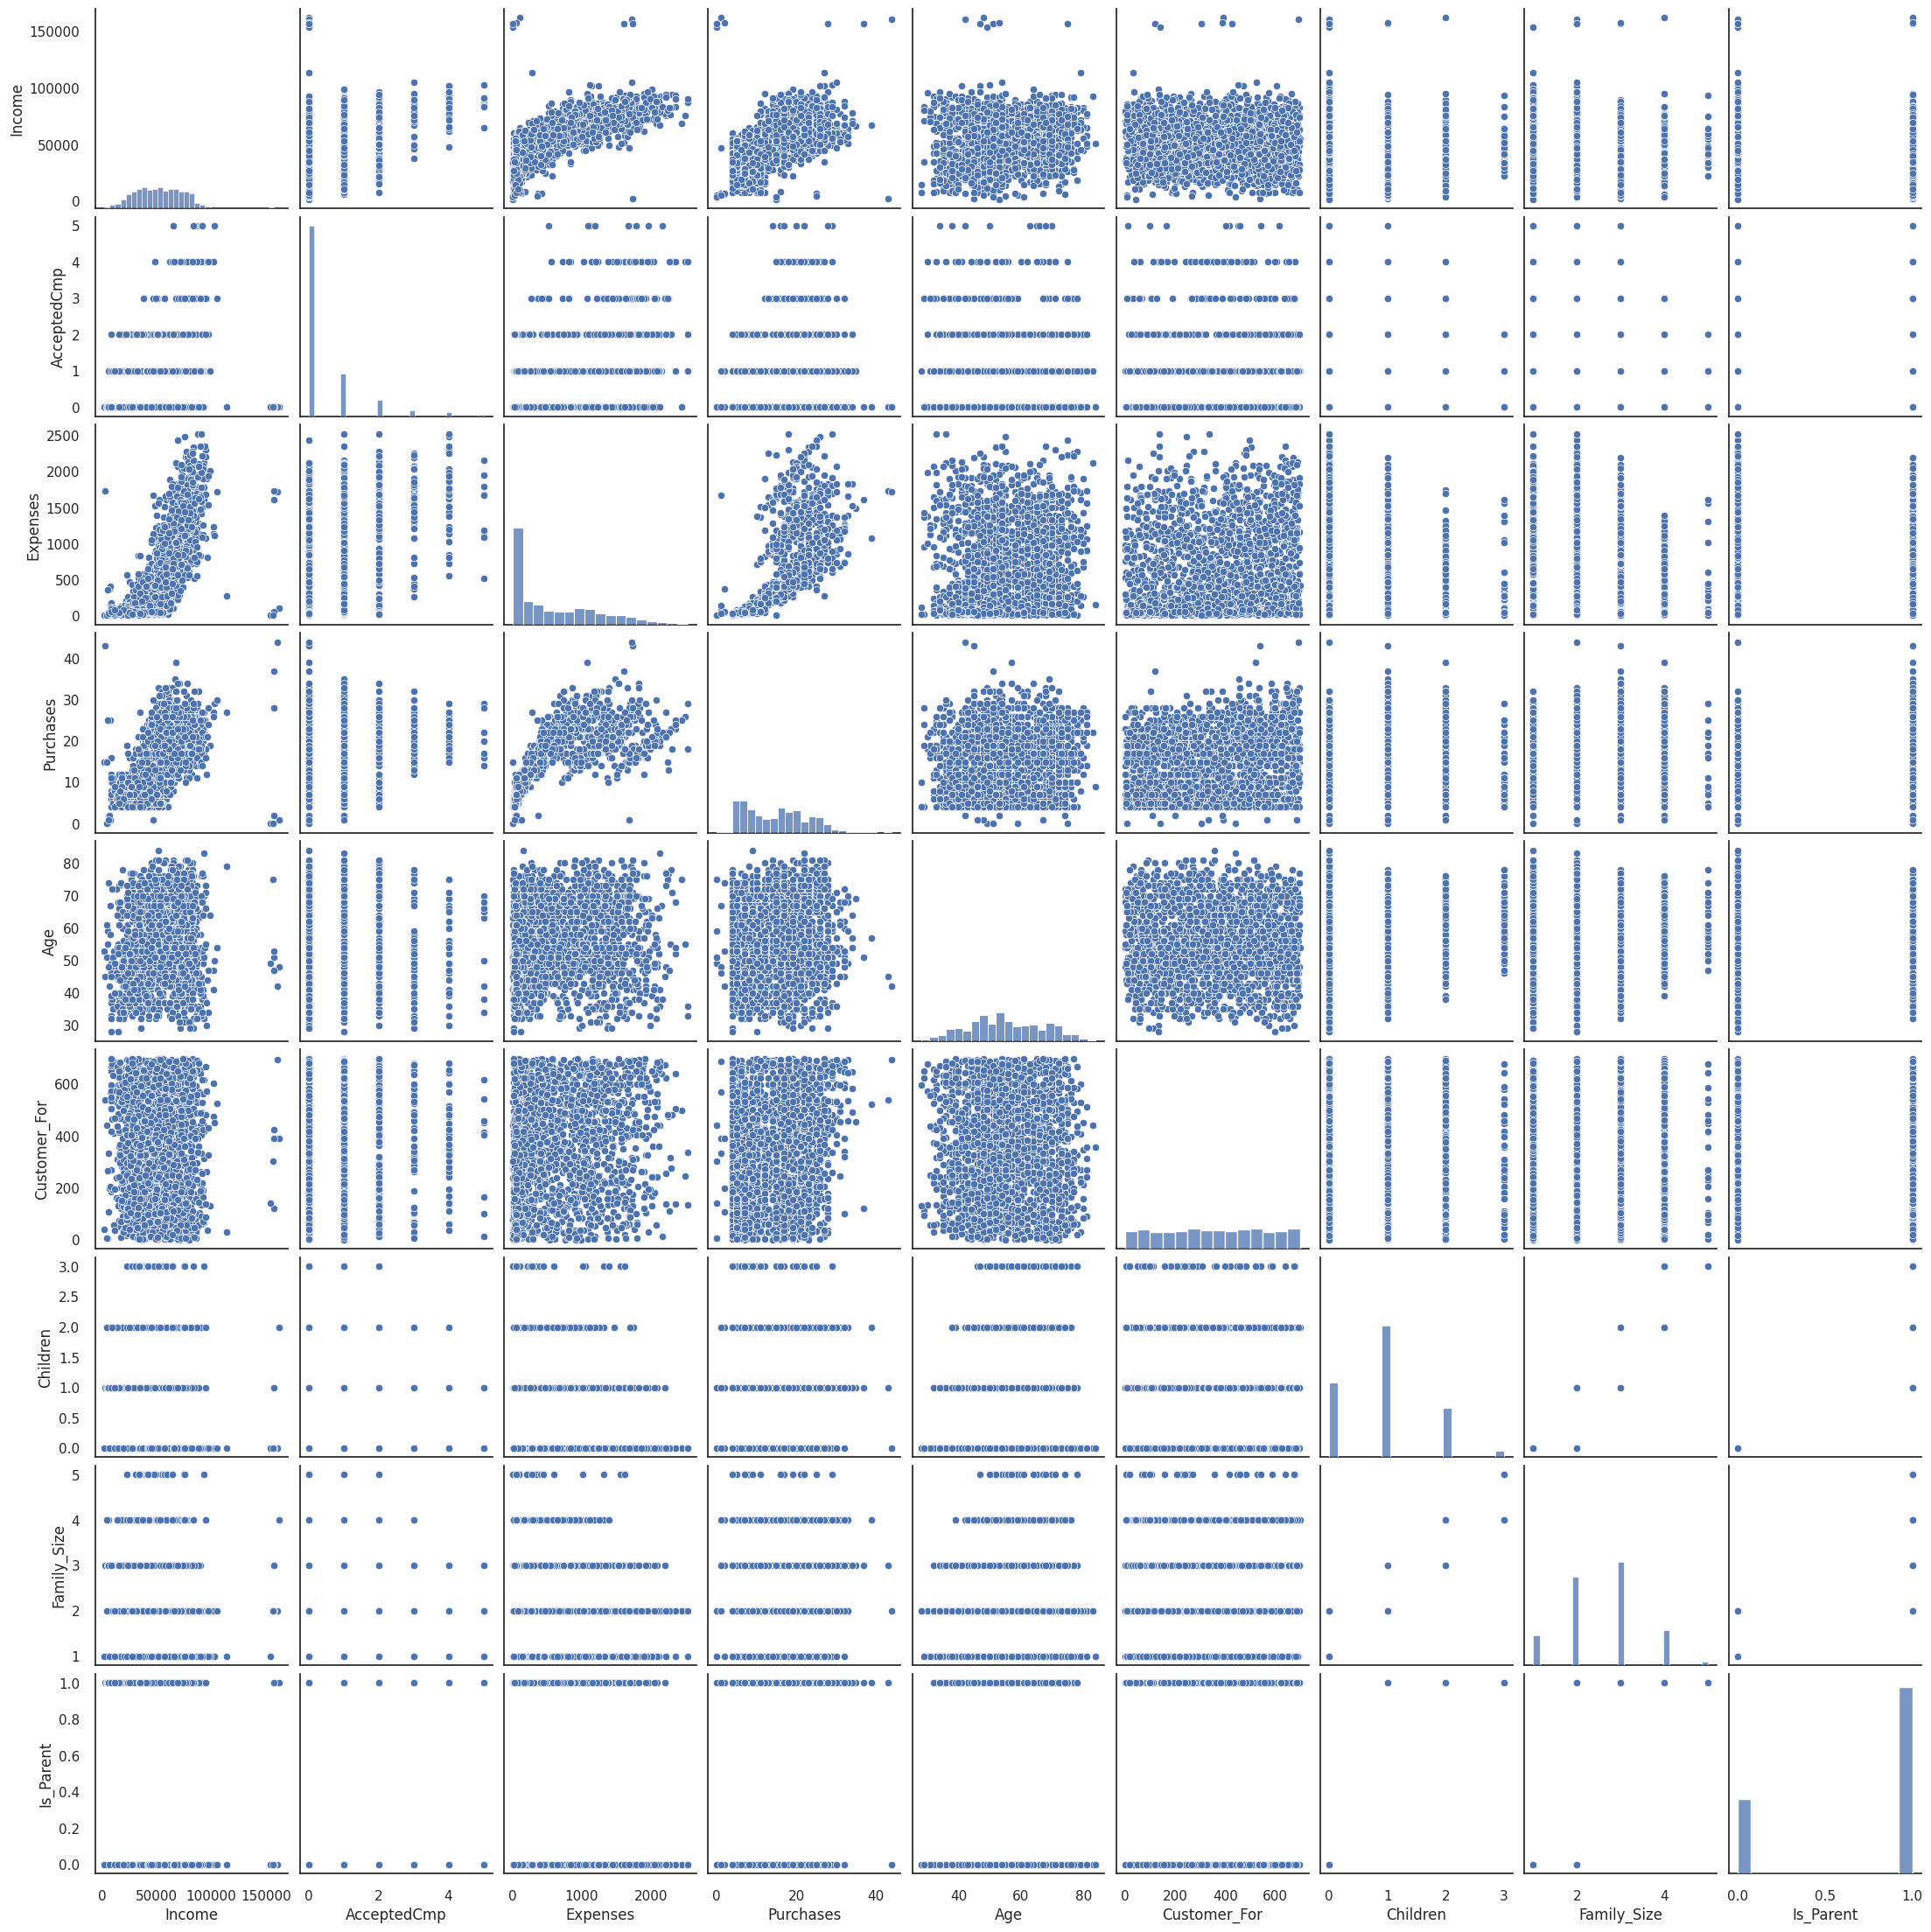

In [75]:
# Create pairplot
sns.pairplot(df1)
plt.show()

## Standardizing numerical features

In [76]:
scaler = StandardScaler()
col_scale = ['Income', 'Children', 'Expenses',
       'AcceptedCmp', 'Purchases', 'Age', 'Customer_For']

df[col_scale] = scaler.fit_transform(df[col_scale])

## Encoding categorical variables

In [77]:
label_encoder = preprocessing.LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Living_With'] = label_encoder.fit_transform(df['Living_With'])

In [78]:
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Expenses,AcceptedCmp,Purchases,Age,Customer_For,Living_With,Children,Family_Size,Is_Parent
0,2,0.288712,58,635,88,546,172,88,88,3,...,1,1.680176,0.620456,1.319340,1.016868,1.529793,0,-1.264308,1,0
1,2,-0.262203,38,11,1,6,2,1,6,2,...,0,-0.962202,-0.501987,-1.155857,1.273264,-1.191143,0,1.395139,3,1
2,2,0.918149,26,426,49,127,111,21,42,1,...,0,0.282541,-0.501987,0.798246,0.333146,-0.206659,1,-1.264308,2,0
3,2,-1.182324,26,11,4,20,10,3,5,2,...,0,-0.918994,-0.501987,-0.895310,-1.290693,-1.062517,1,0.065416,3,1
4,0,0.295952,94,173,43,118,46,27,15,5,...,0,-0.305762,-0.501987,0.537699,-1.034298,-0.953679,1,0.065416,3,1


Dimensionality Reduction

In [79]:
pca = PCA()
pcs = pca.fit_transform(df)
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,483.024866,200.364125,-70.332924,-41.774496,-21.636607,-12.062838,-0.128996,0.593490,6.881557,4.158936,...,-0.458744,-0.331225,-0.165291,-0.002119,0.017952,-0.013926,1.147214e-12,3.944637e-14,-3.585892e-14,1.300403e-13
1,-339.486351,-12.011223,21.670249,-5.729058,-3.142073,10.029404,1.633989,-2.267231,-0.392215,1.235335,...,-0.101674,0.086669,0.000355,0.014653,0.005737,-0.015324,-3.279076e-15,7.407310e-13,8.333469e-14,-2.403521e-13
2,95.661342,-82.686027,-50.092027,-47.130997,-41.672960,18.537797,-12.468731,2.913437,-2.485066,-1.677741,...,-0.280268,0.223675,-0.124996,-0.016933,0.011727,-0.015160,-4.191237e-14,-2.385422e-13,-1.356177e-13,-1.844194e-13
3,-332.362304,1.352566,18.085757,-11.031739,-7.094915,21.449376,2.949223,-0.573422,-0.445643,-0.822727,...,0.064356,-0.133620,0.065182,0.022194,0.006123,-0.008105,-1.921117e-15,-1.237505e-13,-2.171076e-13,7.872950e-13
4,-138.181228,19.973290,-7.115371,-30.570628,9.742447,-42.295259,-20.787522,2.962758,-0.229380,1.749844,...,0.113908,-0.168230,0.083405,0.052724,0.020117,0.001609,1.646325e-13,-2.797760e-14,3.404224e-14,2.907504e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,382.490972,-162.821108,-143.313069,123.142864,57.295227,6.703614,45.682412,-3.437429,4.158641,-0.628005,...,0.081072,-0.233655,-0.006138,-0.081367,0.030816,0.013563,-2.730763e-14,-2.385061e-14,1.345758e-14,8.882639e-15
2232,20.186209,-175.675773,43.925987,-7.770001,-2.785630,-7.627321,-1.023898,5.070556,1.868853,2.479110,...,-0.404695,0.623569,0.555697,-0.534062,-0.025637,-0.000893,3.449487e-14,1.251627e-14,9.660013e-16,-2.717253e-14
2233,554.817087,-238.599845,48.859144,-20.368538,4.337911,-36.986240,-33.556764,-1.283566,-3.250250,-3.925431,...,-0.113223,0.026449,-0.649197,-0.246161,-0.167635,-0.001893,1.031906e-14,1.962995e-14,2.070729e-14,7.753930e-15
2234,135.192116,-11.412807,-24.863730,-9.406895,-29.001372,36.509954,9.373744,2.088858,-3.805020,0.805759,...,0.155150,-0.181783,0.061898,0.058484,0.012258,-0.004803,-1.568980e-14,1.568639e-14,-7.845342e-15,-6.970589e-15


In [80]:
np.cumsum(pca.explained_variance_ratio_)

array([0.78641743, 0.9579999 , 0.9761534 , 0.98568415, 0.99101418,
       0.99583474, 0.99984472, 0.99988659, 0.99992136, 0.99994155,
       0.99996031, 0.99997232, 0.99997832, 0.99998321, 0.99998771,
       0.99999187, 0.99999519, 0.99999708, 0.9999984 , 0.9999988 ,
       0.99999913, 0.99999944, 0.99999968, 0.99999988, 0.99999995,
       1.        , 1.        , 1.        , 1.        , 1.        ])

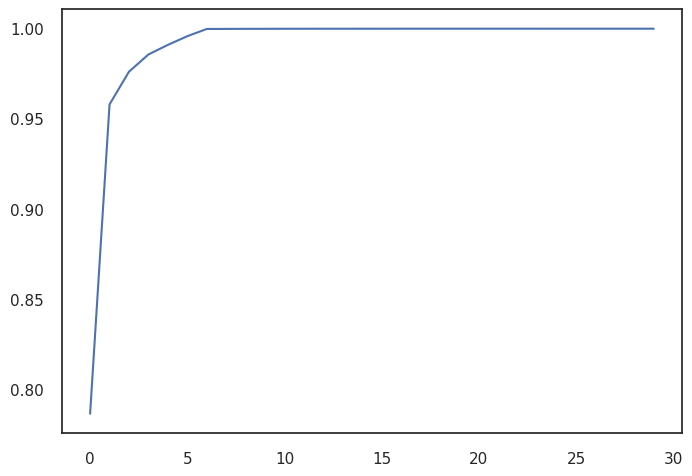

In [81]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [82]:
pca = PCA(n_components=6)
pcs = pca.fit_transform(df)
df_pca = pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,483.024866,200.364125,-70.332924,-41.774496,-21.636607,-12.062838
1,-339.486351,-12.011223,21.670249,-5.729058,-3.142073,10.029404
2,95.661342,-82.686027,-50.092027,-47.130997,-41.672960,18.537797
3,-332.362304,1.352566,18.085757,-11.031739,-7.094915,21.449376
4,-138.181228,19.973290,-7.115371,-30.570628,9.742447,-42.295259
...,...,...,...,...,...,...
2231,382.490972,-162.821108,-143.313069,123.142864,57.295227,6.703614
2232,20.186209,-175.675773,43.925987,-7.770001,-2.785630,-7.627321
2233,554.817087,-238.599845,48.859144,-20.368538,4.337911,-36.986240
2234,135.192116,-11.412807,-24.863730,-9.406895,-29.001372,36.509954


In [83]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2236.0,4.962359e-14,370.015008,-351.666526,-322.790917,-142.914401,241.094438,1223.034847
PC2,2236.0,-4.047170e-14,172.834022,-633.765966,-52.113048,-9.259589,18.970766,1491.138965
PC3,2236.0,-1.016877e-15,56.217694,-288.764443,-14.772471,15.284589,25.727630,318.830279
PC4,2236.0,-6.813075e-15,40.733921,-177.789614,-12.172284,-4.840146,10.907360,241.041947
PC5,2236.0,1.296518e-15,30.461948,-153.226127,-8.068435,-1.708634,5.498294,173.155601
PC6,2236.0,-1.334651e-15,28.969514,-65.436427,-24.680461,-0.929857,24.507500,74.194946


Clustering

In [84]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(df_pca)
    wcss.append(km.inertia_)

In [85]:
wcss

[387480943.2323464,
 156665377.05188587,
 111118621.69495954,
 81017133.1835406,
 68295742.02750202,
 57489396.41193562,
 49852816.188150786,
 45142416.206612036,
 40980896.5433661,
 37311556.47252413,
 34654331.08487919,
 32141504.847134322,
 30001979.36016673,
 28600298.88205072,
 27434292.480536245,
 26566124.74537805,
 25688391.70497066,
 24666709.19272231,
 23959814.591118883]

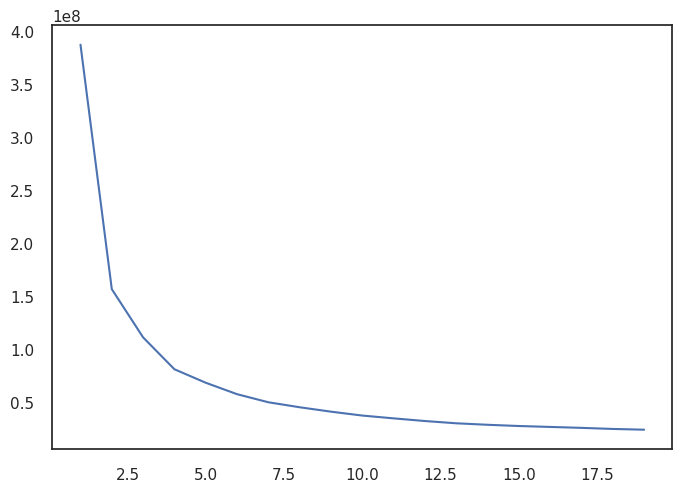

In [86]:
plt.plot(range(1,20),wcss)

In [87]:
km = KMeans(n_clusters=4)
labels = km.fit_predict(df_pca)
labels

array([2, 0, 3, ..., 1, 3, 0], dtype=int32)

In [88]:
km.cluster_centers_

array([[-2.83028230e+02, -7.22572663e+00,  8.63061345e+00,
        -9.43221047e-01, -5.85557858e-01, -5.08688916e-01],
       [ 6.74931941e+02, -1.66692245e+02,  1.36398911e+01,
        -3.75669601e+00, -2.39361277e+00, -1.24799680e-01],
       [ 4.41407880e+02,  3.72549892e+02,  1.23811727e+01,
         3.21683609e-01, -2.63471921e+00, -1.94074865e+00],
       [ 1.18371426e+02, -3.44584542e+01, -3.00643182e+01,
         3.82116934e+00,  3.42117453e+00,  1.86619754e+00]])

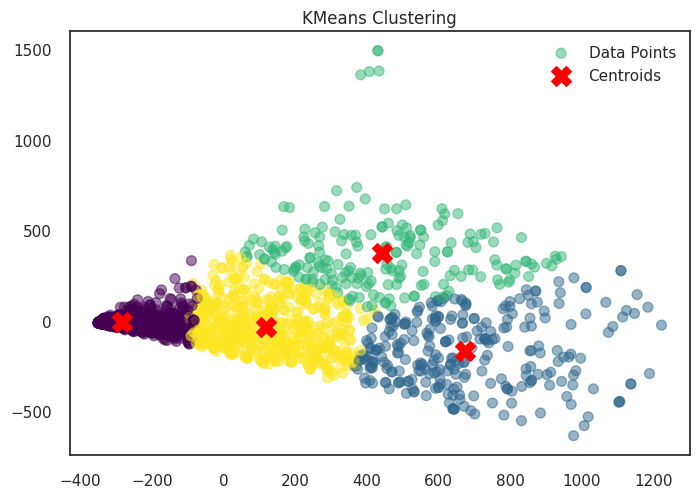

In [134]:
import numpy as np

# If df_pca isn't a NumPy array
if not isinstance(df_pca, np.ndarray):
    df_pca1 = np.array(df_pca)

# Then your original code should work fine
plt.scatter(df_pca1[:, 0], df_pca1[:, 1], c=km.labels_, cmap='viridis', s=50, alpha=0.5, label='Data Points')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centroids')

plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [90]:
silhouette_score(df_pca,labels)

0.5245787364017729

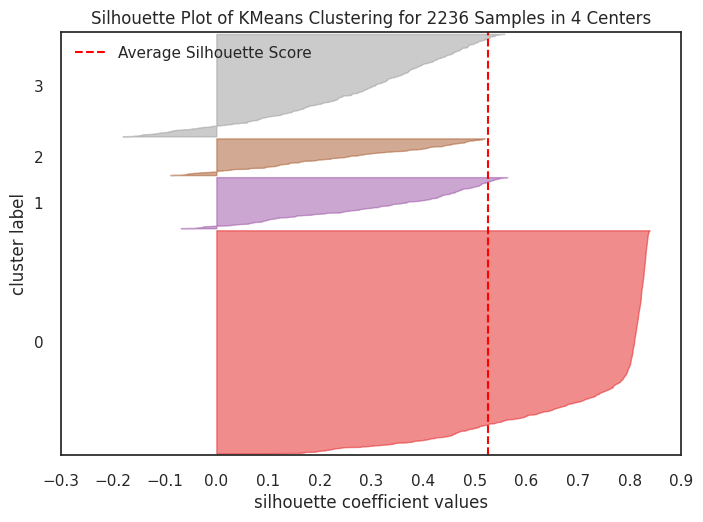

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2236 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [91]:
silhouettevis = SilhouetteVisualizer(KMeans(n_clusters=4))
vis = silhouettevis.fit(df_pca)
vis.show()

In [92]:
sil_score = []

for i in range(4,10):
    kms = KMeans(n_clusters=i)
    kmlabels = kms.fit_predict(df_pca)
    sil_score.append(silhouette_score(df_pca,kmlabels))

In [93]:
sil_score

[0.524810787021401,
 0.48226430589703506,
 0.4771847092654977,
 0.4767863824995727,
 0.4778056465709568,
 0.4405377420828146]

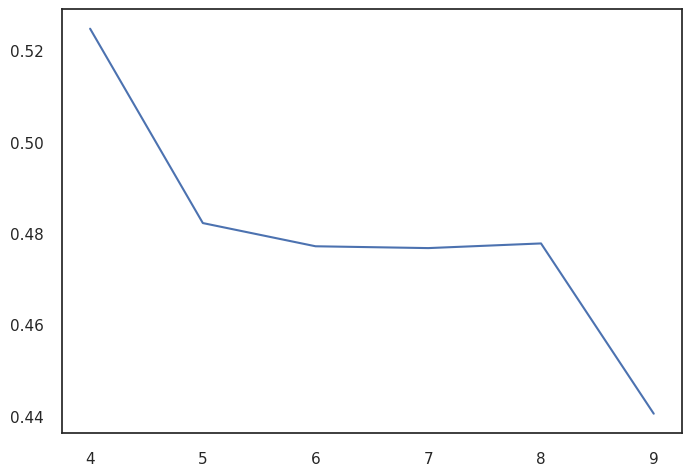

In [94]:
plt.plot(range(4,10),sil_score)

In [95]:
df['Clusters']=labels

In [96]:
df.groupby(['Clusters']).mean()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Expenses,AcceptedCmp,Purchases,Age,Customer_For,Living_With,Children,Family_Size,Is_Parent
Clusters,,,,,,,,,,,,,,,,,,,,,
0,1.351037,-0.681456,49.112033,57.947718,8.275519,33.804979,11.586722,8.354357,20.941909,2.235685,...,0.098755,-0.772896,-0.289608,-0.743955,-0.153545,-0.110495,0.646473,0.351223,2.861411,0.869710
1,1.032374,0.993665,49.615108,978.658273,44.568345,329.726619,64.392086,45.482014,69.043165,2.179856,...,0.338129,1.538702,1.064589,0.984284,0.241840,0.339931,0.640288,-0.546831,2.179856,0.474820
2,1.391960,1.224068,52.185930,520.708543,70.150754,694.035176,104.371859,70.396985,72.150754,1.356784,...,0.326633,1.538608,0.518929,0.750457,-0.063687,0.163732,0.582915,-1.117303,1.693467,0.090452
3,1.333935,0.543910,47.772563,423.310469,40.489170,185.673285,56.494585,43.018051,71.406137,2.944043,...,0.101083,0.356314,-0.090695,0.854682,0.235494,0.010945,0.666065,-0.088199,2.550542,0.723827


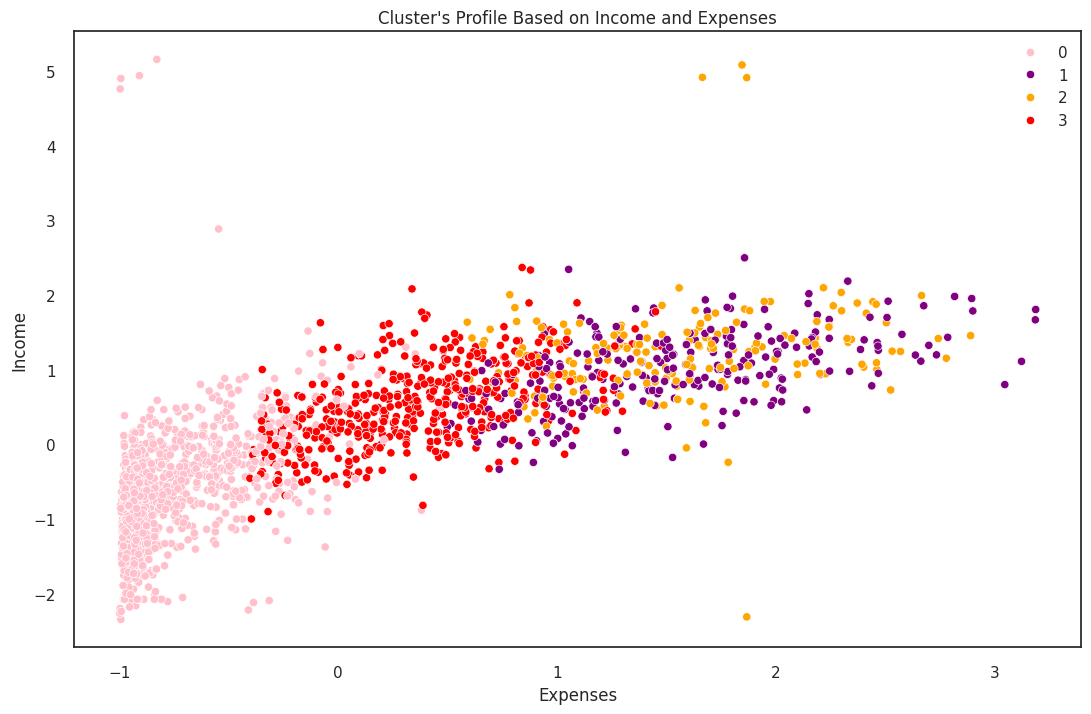

In [97]:
colors =['#FFC0CB','#800080','#FFA500','#FF0000']
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=df, x=df['Expenses'], y=df['Income'], hue=df['Clusters'],palette=colors)
pl.set_title("Cluster's Profile Based on Income and Expenses")
plt.legend();

Income vs spending plot shows the clusters pattern

group 2: low spending & low income

group 1: high spending & average income

group 3: high spending & high income

group 0: low spending & average income


Splitting the data

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Expenses,AcceptedCmp,Purchases,Age,Customer_For,Living_With,Children,Family_Size,Is_Parent,Clusters
0,2,0.288712,58,635,88,546,172,88,88,3,...,1.680176,0.620456,1.319340,1.016868,1.529793,0,-1.264308,1,0,2
1,2,-0.262203,38,11,1,6,2,1,6,2,...,-0.962202,-0.501987,-1.155857,1.273264,-1.191143,0,1.395139,3,1,0
2,2,0.918149,26,426,49,127,111,21,42,1,...,0.282541,-0.501987,0.798246,0.333146,-0.206659,1,-1.264308,2,0,3
3,2,-1.182324,26,11,4,20,10,3,5,2,...,-0.918994,-0.501987,-0.895310,-1.290693,-1.062517,1,0.065416,3,1,0
4,0,0.295952,94,173,43,118,46,27,15,5,...,-0.305762,-0.501987,0.537699,-1.034298,-0.953679,1,0.065416,3,1,0


In [100]:
X = df.iloc[:,:30]
Y = df['Clusters']

In [101]:
X.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Expenses,AcceptedCmp,Purchases,Age,Customer_For,Living_With,Children,Family_Size,Is_Parent
0,2,0.288712,58,635,88,546,172,88,88,3,...,1,1.680176,0.620456,1.319340,1.016868,1.529793,0,-1.264308,1,0
1,2,-0.262203,38,11,1,6,2,1,6,2,...,0,-0.962202,-0.501987,-1.155857,1.273264,-1.191143,0,1.395139,3,1
2,2,0.918149,26,426,49,127,111,21,42,1,...,0,0.282541,-0.501987,0.798246,0.333146,-0.206659,1,-1.264308,2,0
3,2,-1.182324,26,11,4,20,10,3,5,2,...,0,-0.918994,-0.501987,-0.895310,-1.290693,-1.062517,1,0.065416,3,1
4,0,0.295952,94,173,43,118,46,27,15,5,...,0,-0.305762,-0.501987,0.537699,-1.034298,-0.953679,1,0.065416,3,1


In [102]:
Y.head()

,Clusters
0,2
1,0
2,3
3,0
4,0


In [103]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [104]:
print(Xtrain.shape , Xtest.shape , Ytrain.shape ,Ytest.shape)

(1788, 30) (448, 30) (1788,) (448,)


Model Building

In [105]:
from sklearn.metrics import classification_report , accuracy_score

Logistic Regression model

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
LR_model = LogisticRegression()

LR_model.fit(Xtrain,Ytrain)

LRpred = LR_model.predict(Xtest)

In [108]:
print(classification_report(Ytest,LRpred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       249
           1       0.87      0.83      0.85        54
           2       0.82      0.90      0.86        41
           3       0.82      0.87      0.84       104

    accuracy                           0.92       448
   macro avg       0.87      0.89      0.88       448
weighted avg       0.92      0.92      0.92       448



KNN model

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
KNN_model = KNeighborsClassifier()

KNN_model.fit(Xtrain,Ytrain)

KNNpred = KNN_model.predict(Xtest)

In [111]:
print(classification_report(Ytest,KNNpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       249
           1       0.93      0.93      0.93        54
           2       0.90      0.90      0.90        41
           3       0.93      0.93      0.93       104

    accuracy                           0.96       448
   macro avg       0.94      0.94      0.94       448
weighted avg       0.96      0.96      0.96       448



Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
DT_model = DecisionTreeClassifier(criterion='entropy')

DT_model.fit(Xtrain,Ytrain)

DTpred = DT_model.predict(Xtest)

In [114]:
print(classification_report(Ytest,DTpred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       249
           1       0.93      0.94      0.94        54
           2       0.93      0.90      0.91        41
           3       0.93      0.93      0.93       104

    accuracy                           0.96       448
   macro avg       0.94      0.94      0.94       448
weighted avg       0.96      0.96      0.96       448



[Text(0.4142857142857143, 0.95, 'x[21] <= -0.179\nentropy = 1.669\nsamples = 1788\nvalue = [956, 224, 158, 450]'),
 Text(0.14285714285714285, 0.85, 'x[3] <= 267.5\nentropy = 0.309\nsamples = 991\nvalue = [936, 0, 0, 55]'),
 Text(0.05714285714285714, 0.75, 'x[3] <= 238.5\nentropy = 0.022\nsamples = 934\nvalue = [932, 0, 0, 2]'),
 Text(0.02857142857142857, 0.65, 'entropy = 0.0\nsamples = 922\nvalue = [922, 0, 0, 0]'),
 Text(0.08571428571428572, 0.65, 'x[8] <= 26.5\nentropy = 0.65\nsamples = 12\nvalue = [10, 0, 0, 2]'),
 Text(0.05714285714285714, 0.55, 'x[25] <= -0.667\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 0, 2]'),
 Text(0.02857142857142857, 0.45, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.08571428571428572, 0.45, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.11428571428571428, 0.55, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]'),
 Text(0.22857142857142856, 0.75, 'x[3] <= 279.5\nentropy = 0.367\nsamples = 57\nvalue = [4, 0, 0, 53]'),
 Text(0.2

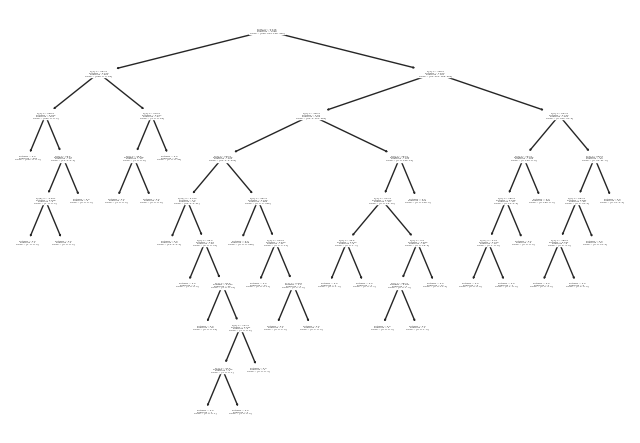

In [115]:
from sklearn import tree
tree.plot_tree(DT_model)

Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
RF_model = RandomForestClassifier(criterion='entropy')

RF_model.fit(Xtrain, Ytrain)

RFpred = RF_model.predict(Xtest)

In [118]:
print(classification_report(Ytest , RFpred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       249
           1       0.88      0.94      0.91        54
           2       0.97      0.85      0.91        41
           3       0.94      0.97      0.96       104

    accuracy                           0.97       448
   macro avg       0.95      0.94      0.94       448
weighted avg       0.97      0.97      0.97       448



Adaboost

In [119]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
AD_model = AdaBoostClassifier(n_estimators=100 , random_state=25)

AD_model.fit(Xtrain,Ytrain)

ADpred = AD_model.predict(Xtest)

In [121]:
print(classification_report(Ytest , ADpred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       249
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        41
           3       0.48      1.00      0.65       104

    accuracy                           0.75       448
   macro avg       0.37      0.48      0.40       448
weighted avg       0.67      0.75      0.68       448



Model Validation

In [122]:
from sklearn.model_selection import KFold , cross_val_score

In [123]:
kfold_LR = cross_val_score(LR_model, X,Y, cv=5)
print('KFold validation score of Logistic Regression model is ',kfold_LR.mean())

kfold_KNN = cross_val_score(KNN_model, X,Y, cv=5)
print('KFold validation score of KNN model is ',kfold_KNN.mean())

kfold_DT = cross_val_score(DT_model, X,Y, cv=5)
print('KFold validation score of Decision Tree model is ',kfold_DT.mean())

kfold_RF = cross_val_score(RF_model, X,Y, cv=5)
print('KFold validation score of Random Forest model is ',kfold_RF.mean())

kfold_AD = cross_val_score(AD_model, X,Y, cv=5)
print('KFold validation score of Adaboost model is ',kfold_AD.mean())

KFold validation score of Logistic Regression model is  0.9186011904761905
KFold validation score of KNN model is  0.9745106263982104
KFold validation score of Decision Tree model is  0.9789819031639502
KFold validation score of Random Forest model is  0.977193192713327
KFold validation score of Adaboost model is  0.7558095637583891


In [124]:
kfold_score = {'Kfold_Score':[0.918,0.974,0.977,0.977,0.755]}

In [125]:
df_score = pd.DataFrame(kfold_score , index = ['LR_model','KNN_model','DT_model','RF_model','AD_model'])

In [126]:
df_score.sort_values(by='Kfold_Score',ascending=False)

,Kfold_Score
DT_model,0.977
RF_model,0.977
KNN_model,0.974
LR_model,0.918
AD_model,0.755


Random Forest model will be used for deployment

In [135]:
Xtest[:5]

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Expenses,AcceptedCmp,Purchases,Age,Customer_For,Living_With,Children,Family_Size,Is_Parent
1755,2,-1.678960,42,3,9,4,7,8,7,4,...,0,-0.943922,-0.501987,-0.634763,-0.863367,0.570045,0,1.395139,3,1
370,1,-0.760146,66,10,4,7,0,6,3,1,...,0,-0.957217,-0.501987,-1.286131,-1.290693,-1.413765,1,0.065416,3,1
1250,0,0.841355,64,882,29,514,38,29,44,1,...,1,1.545565,2.865343,-0.243942,0.333146,-0.236342,1,-1.264308,2,0
852,1,1.419549,38,556,54,845,202,133,63,1,...,0,2.072378,1.742900,1.319340,1.016868,1.218122,1,-1.264308,2,0
1750,0,0.531798,48,918,21,118,13,10,21,3,...,1,0.822650,1.742900,0.537699,0.675007,1.322012,1,0.065416,3,1


In [136]:
Ytest[:5]

,Clusters
1755,0
370,0
1250,1
852,2
1750,1


In [138]:
#Predictions

RF_model.predict(Xtest[:5])

array([0, 0, 1, 2, 1], dtype=int32)

Predictions are accurate.